In [607]:
#importar bibliotecas utiles. De no tenerse alguna (import not found) se debe instalar, generalmente con pip
import scipy.signal
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd


#definicion de 3 bloques principales: TX, canal y RX

def transmisor(x_t):
    
    #x_t debe ser una lista con multiples array (caso de 3 señales) o una sola(caso del tono)
    
    #Su codigo para el transmisor va aca
    s_t=x_t #eliminar cuando se tenga solucion propuesta
    
    return s_t #note que s_t es una unica señal utilizando un unico array, NO una lista

In [608]:
def receptor(s_t_prima,f_rf):
    f = f_rf
    f=f*1
    # Note que f_rf es la frecuencia utilizada para la seleccionar la señal que se desea demodular
    
    #Su codigo para el receptor va aca  
    m_t_reconstruida=s_t_prima #eliminar cuando se tenga solucion propuesta
    
    #note que en el caso de multiples señales
    
    return m_t_reconstruida

In [609]:
def white_noise(s_t):
    # print("White noise \n")
    # print(s_t)
    mu = 0
    sigma = 0.1 * np.std(s_t)
    white_noise = np.random.normal(mu, sigma, s_t.shape[0])

    return white_noise

def canal(s_t):
    
    #Note que los parámetros mu (media) y sigma (desviacion) del ruido blanco Gaussiano deben cambiarse segun especificaciones
    canal_noise = white_noise(s_t[0])
    
    signal_noise= canal_noise + s_t[0]
    samplerate_noise = s_t[1]
    s_t_prima = []
    s_t_prima.append(signal_noise)
    s_t_prima.append(samplerate_noise)

    return  s_t_prima

In [610]:
#Modulo Graficación
# Grafica la señal con respecto al tiempo

def plot_time_signal(titulo_grafico, signal, samplerate_signal):

    plt.figure()
    #time_signal = np.linspace(0., 1000 / samplerate_signal, 1000) #shape entrega una tupla
    time_signal = np.linspace(0., signal.shape[0] / samplerate_signal, signal.shape[0]) #shape entrega una tupla
    
    plt.plot(time_signal,signal) 
    plt.xlim([0, 0.01]) #mostrar solo parte de la onda
    plt.title(titulo_grafico)
    #plt.show()
    return 0


# Grafica la señal con respecto a la frecuencia
def plot_psd_signal(titulo_grafico, signal, fs):

    (f, S)= scipy.signal.welch(signal, fs, nperseg=4*1024)
    plt.figure()
    plt.semilogy(f, S)
    plt.xlim([0, fs/10])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title(titulo_grafico)
    #plt.show()

    return 0

In [611]:
## Inicio de ejecucion ##
#Se da con ejemplo de tono, pasandolo por todo el sistema sin ningun cambio

#leer tono desde archivo
samplerate_tono, tono = wavfile.read("datos/tono.wav")
samplerate_vowel1, vowel1 = wavfile.read("datos/vowel_1.wav")
samplerate_vowel2, vowel2 = wavfile.read("datos/vowel_2.wav")
samplerate_vowel3, vowel3 = wavfile.read("datos/vowel_3.wav")


#oir tono rescatado. Esta funcion sirve tambien como transductor de salida 
#Note la importancia de la frecuencia de muestreo (samplerate), la cual es diferente a la frecuencia fm del tono.
sd.play(vowel3, samplerate_vowel3)

#graficar tono
#plt.plot(np.linspace(0., tono.shape[0] / samplerate_tono, tono.shape[0]),tono)
#plt.xlim([0, 0.01]) #mostrar solo parte de la onda

#agregar el tono a la lista X_t requerida por el transmisor
x_t = []
# x_t.append(tono)
# x_t.append(vowel1)
# x_t.append(vowel2)
# x_t.append(vowel3)
x_t.append([tono, samplerate_tono])
x_t.append([vowel1, samplerate_vowel1])
x_t.append([vowel2, samplerate_vowel2])
x_t.append([vowel3, samplerate_vowel3])
print("Se envia una lista con "+str(len(x_t))+" señales")

Se envia una lista con 4 señales


0

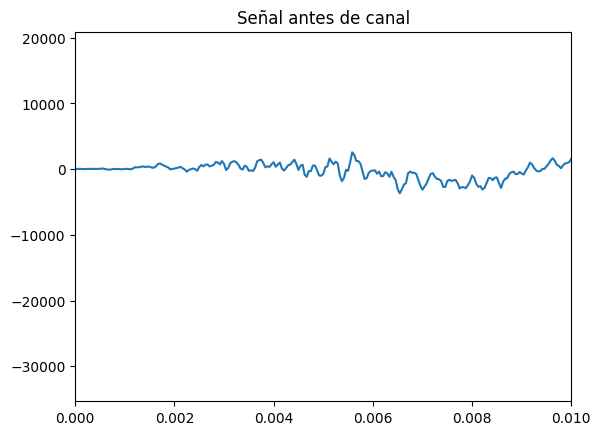

In [612]:
#llamar funcion de transmisor
# 0: tono   1: vowel1   2: vowel2   3: vowel3
opcion = 1
s_t = transmisor(x_t[opcion])
plot_time_signal("Señal antes de canal", s_t[0], s_t[1])

0

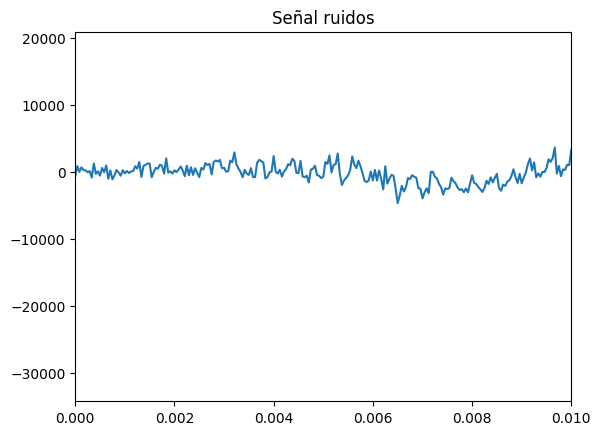

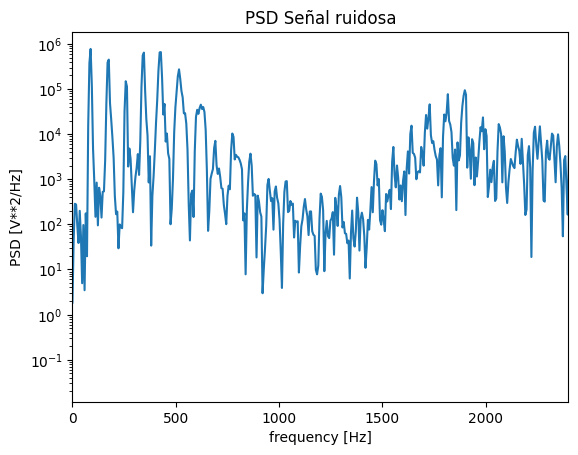

In [613]:
#llamar funcion que modela el canal

s_t_prima = canal(s_t)

plot_time_signal("Señal ruidos", s_t_prima[0], s_t_prima[1])
plot_psd_signal("PSD Señal ruidosa", s_t_prima[0], s_t_prima[1])

In [614]:
#Graficas en el dominio de la frecuencia para el canal


In [615]:
#llamar funcion de receptor
m_t_reconstruida=receptor(s_t_prima, samplerate_tono)

#graficar señal recibida
# plt.plot(np.linspace(0., m_t_reconstruida.shape[0] / samplerate_tono, m_t_reconstruida.shape[0]),m_t_reconstruida)
# plt.xlim([0, 0.01]) #mostrar solo parte de la onda
